<a href="https://colab.research.google.com/github/LuiguiUNAB/CIENCIA_DATOS_2025/blob/main/CLASE_4_MEDIDAS_DE_TENDENCIA_CENTRAL_VARIABILIDAD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AGENDA
1. DEFINIR CONCEPTOS
2. CARGAR DATOS DESDE DRIVE
3. CÁLCULO DE DESVIACIÓN ESTÁNDAR
4. EXPLORACIÓN DE DISTRIBUCIÓN DE DATOS (GRÁFICOS)

##1. DEFINICIÓN DE CONCEPTOS
1.1 VARIANZA: Es una medida que indica cuánto se dispersan los datos alrededor de la media, mostrando qué tan alejados están en promedio.

1.2 DESVIACIÓN ESTÁNDAR: Mide la dispersión de los datos en las mismas unidades originales. Indica cuánto suelen alejarse los valores de la media.

1.3 DESVIACIÓN DE LA MEDIA ABSOLUTA: Es el promedio de las diferencias absolutas entre cada valor y la media. Refleja, en general, qué tanto se desvían los datos de la media.

1.4 DESVIACIÓN ABSOLUTA MEDIADA DE LA MEDIANA (MAD): Es la mediana de las desviaciones absolutas respecto a la mediana de los datos. Es una medida de dispersión más resistente a valores extremos.

1.5 RANGO: Es la diferencia entre el valor máximo y el mínimo. Indica el intervalo total de variación de los datos.

1.6 ESTADÍSTICA ORDINAL: Se refiere a datos que pueden ordenarse (por ejemplo, “bajo, medio, alto”), pero en los que no se puede medir con precisión la distancia entre categorías.

1.7 PERCENTIL: Es un valor que divide los datos de tal forma que un cierto porcentaje de observaciones queda por debajo de él. Por ejemplo, el percentil 50 corresponde a la mediana.

1.8 RANGO INTERCUARTIL (IQR): Es la diferencia entre el tercer cuartil y el primero. Muestra la dispersión del 50% central de los datos, reduciendo la influencia de valores atípicos.


In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels import robust
#from scipy.stats import trim_mean
import wquantiles

In [90]:
data = pd.read_csv('/content/drive/MyDrive/FUNDAMENTOS DE CIENCIA DE DATOS /state.csv')
data.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [91]:
data.describe()

,Population,Murder.Rate
count,5.000000e+01,50.000000
mean,6.162876e+06,4.066000
std,6.848235e+06,1.915736
min,5.636260e+05,0.900000
25%,1.833004e+06,2.425000
50%,4.436370e+06,4.000000
75%,6.680312e+06,5.550000
max,3.725396e+07,10.300000


In [92]:
data.columns

Index(['State', 'Population', 'Murder.Rate', 'Abbreviation'], dtype='object')

In [93]:
#Calculando la DE y los cuartiles
data["Population"].std()

6848235.347401142

In [94]:
# Extraer la desviación estandar de la tasa de asesinatos
data["Murder.Rate"].std()

1.915736124302923

In [95]:
#Calculo del IQR
data.Population.quantile(0.75) - data.Population.quantile(0.25)

np.float64(4847308.0)

In [96]:
#Calculo IQR de la tasa de asesinatos
data["Murder.Rate"].quantile(0.75) - data["Murder.Rate"].quantile(0.25)

np.float64(3.125)

In [97]:
#MAD de la población
robust.scale.mad(data["Population"])

np.float64(3849876.1459979336)

In [98]:
#Calcular el MAD de la tasa de asesinatos
robust.scale.mad(data["Murder.Rate"])

np.float64(2.3721635496089624)

In [99]:
##HINT - TRABAJO CON DATAFRAMES
data1 = {"Nombre":["Camilo","Kevin","Santiago"],
         "Edades":["10","15","3"],
         "Juegos":["Basketball","Tenis de Mesa","Fútbol"]
}
df = pd.DataFrame(data1)
df

,Nombre,Edades,Juegos
0,Camilo,10,Basketball
1,Kevin,15,Tenis de Mesa
2,Santiago,3,Fútbol


In [100]:
#Renombrar headers
df = df.rename(columns={"Edades":"Años","Juegos":"Deportes"})
df

,Nombre,Años,Deportes
0,Camilo,10,Basketball
1,Kevin,15,Tenis de Mesa
2,Santiago,3,Fútbol


In [101]:
#Reemplazar headers de states, de Inglés a Español
data.columns
data = data.rename(columns={"State":"Estado",
                            "Population":"Población",
                            "Murder.Rate":"Tasa de Asesinatos",
                            "Abbreviation":"Abreviación"})
data.head()

,Estado,Población,Tasa de Asesinatos,Abreviación
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


##4. EXPORACIÓN EN LA DISTRIBUCIÓN DE DATOS
4.1 DIAGRAMA DE CAJA (DEFINIR E INDICAR CÓMO SE VE)

4.2 DIAGRAMA DE FRECUENCIAS

4.3 HISTOGRAMA

4.4 DIAGRAMA DE DENSIDAD


In [127]:
###4.1 DIAGRAMA DE CAJA
data["Población"].quantile([0.05,0.25,0.5,0.75]), data["Tasa de Asesinatos"].quantile([0.05,0.25,0.5,0.75])

(0.05     689529.00
 0.25    1833004.25
 0.50    4436369.50
 0.75    6680312.25
 Name: Población, dtype: float64,
 0.05    1.600
 0.25    2.425
 0.50    4.000
 0.75    5.550
 Name: Tasa de Asesinatos, dtype: float64)

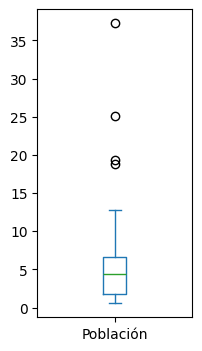

In [105]:
#Gráfica de diagrama de caja
ax = (data.Población/1000000).plot.box(figsize=(2,4))
ax.set_label("Ploblación en millones")
#Ofrecer una explicación de lo que se hace y repetirlo con Murder Rate

El código anterior genera un diagrama de caja para la columna 'Población' en el DataFrame `data`.

- `data.Población / 1000000`: Esto escala los valores de la población dividiéndolos por 1,000,000, lo que facilita la lectura del gráfico (mostrando la población en millones).
- `.plot.box(figsize=(2,4))`: Esto crea el diagrama de caja. `figsize=(2,4)` establece el tamaño del gráfico.
- `ax = ...`: Esto asigna el gráfico creado a la variable `ax`, lo que permite una mayor personalización.
- `ax.set_label("Población en millones")`: Esto establece la etiqueta para el eje y del gráfico.

El diagrama de caja resume visualmente la distribución de los datos de población, mostrando la mediana (la línea en la caja), el rango intercuartil (la caja misma) y los posibles valores atípicos (puntos fuera de los "bigotes").

Text(0, 0.5, 'Tasa de Asesinatos')

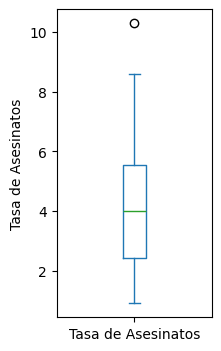

In [106]:
# Gráfica de diagrama de caja para la Tasa de Asesinatos
ax = data["Tasa de Asesinatos"].plot.box(figsize=(2, 4))
ax.set_ylabel("Tasa de Asesinatos")

In [108]:
#Calculando la tabla de frecuencias e histogramas
binnedPopulation=pd.cut(data["Población"],10)
binnedPopulation.value_counts()

,count
Población,
"(526935.67, 4232659.0]",24
"(4232659.0, 7901692.0]",14
"(7901692.0, 11570725.0]",6
"(11570725.0, 15239758.0]",2
"(15239758.0, 18908791.0]",1
"(18908791.0, 22577824.0]",1
"(22577824.0, 26246857.0]",1
"(33584923.0, 37253956.0]",1
"(26246857.0, 29915890.0]",0


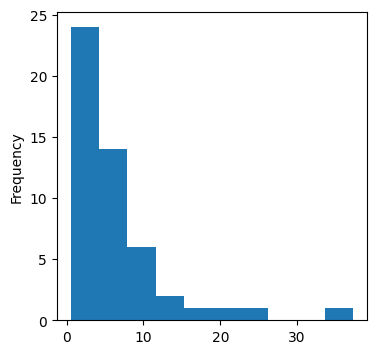

In [109]:
ax = (data.Población/1000000).plot.hist(figsize=(4,4))
ax.set_label("Ploblación en millones")

Text(0.5, 0, 'Tasa de Asesinatos por 1M de habitantes')

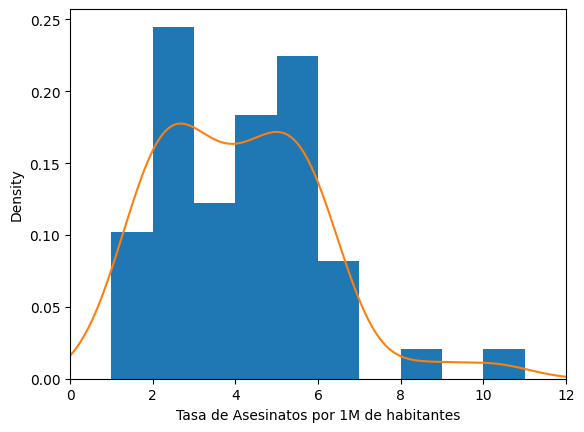

In [111]:
#Diagrama de dispersión y la curva
ax = data["Tasa de Asesinatos"].plot.hist(density = True,xlim=[0,12],bins=range(1,12))
data["Tasa de Asesinatos"].plot.density(ax=ax)
ax.set_xlabel("Tasa de Asesinatos por 1M de habitantes")

#AHORA REALIZO PARA EL DATASET SELECCIONADO

In [112]:
uber = pd.read_csv('/content/drive/MyDrive/FUNDAMENTOS DE CIENCIA DE DATOS /ncr_ride_bookings.csv')
uber.head()

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
0,2024-03-23,12:29:38,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2024-11-29,18:01:39,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,NaN,NaN,NaN,1.0,Vehicle Breakdown,237.0,5.73,NaN,NaN,UPI
2,2024-08-23,08:56:10,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,NaN,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card
3,2024-10-21,17:17:25,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,NaN,NaN,NaN,416.0,34.02,4.6,5.0,UPI
4,2024-09-16,22:08:00,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,NaN,NaN,NaN,737.0,48.21,4.1,4.3,UPI


In [113]:
uber.describe()

,Avg VTAT,Avg CTAT,Cancelled Rides by Customer,Cancelled Rides by Driver,Incomplete Rides,Booking Value,Ride Distance,Driver Ratings,Customer Rating
count,139500.000000,102000.000000,10500.0,27000.0,9000.0,102000.000000,102000.000000,93000.000000,93000.000000
mean,8.456352,29.149636,1.0,1.0,1.0,508.295912,24.637012,4.230992,4.404584
std,3.773564,8.902577,0.0,0.0,0.0,395.805774,14.002138,0.436871,0.437819
min,2.000000,10.000000,1.0,1.0,1.0,50.000000,1.000000,3.000000,3.000000
25%,5.300000,21.600000,1.0,1.0,1.0,234.000000,12.460000,4.100000,4.200000
50%,8.300000,28.800000,1.0,1.0,1.0,414.000000,23.720000,4.300000,4.500000
75%,11.300000,36.800000,1.0,1.0,1.0,689.000000,36.820000,4.600000,4.800000
max,20.000000,45.000000,1.0,1.0,1.0,4277.000000,50.000000,5.000000,5.000000


In [114]:
uber.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [115]:
#Muestro las columnas de las variables que voy a estudiar
uber[["Ride Distance","Driver Ratings"]].std()

,0
Ride Distance,14.002138
Driver Ratings,0.436871


In [116]:
#Cálculo del rango intercuartil para las variables distancia de carrera y calificaciones del conductor.
uber["Ride Distance"].quantile(0.75) - uber["Ride Distance"].quantile(0.25), uber["Driver Ratings"].quantile(0.75) - uber["Driver Ratings"].quantile(0.25)



(np.float64(24.36), np.float64(0.5))

In [118]:
robust.scale.mad(uber["Ride Distance"]), robust.scale.mad(uber["Driver Ratings"])

(np.float64(nan), np.float64(nan))

In [119]:
uber["Ride Distance"].quantile([0.05,0.25,0.5,0.75])

,Ride Distance
0.05,3.97
0.25,12.46
0.50,23.72
0.75,36.82


In [120]:
uber["Driver Ratings"].quantile([0.05,0.25,0.5,0.75])

,Driver Ratings
0.05,3.3
0.25,4.1
0.50,4.3
0.75,4.6


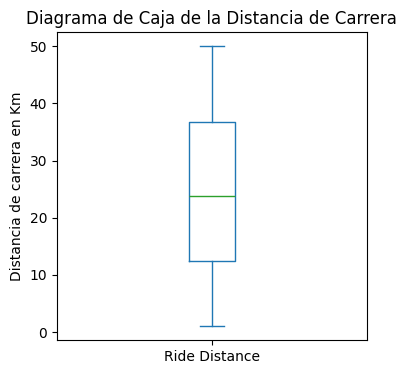

In [135]:
ax1 = (uber["Ride Distance"]).plot.box(figsize=(4 ,4))
ax1.set_ylabel("Distancia de carrera en Km")
plt.title("Diagrama de Caja de la Distancia de Carrera")
plt.show()

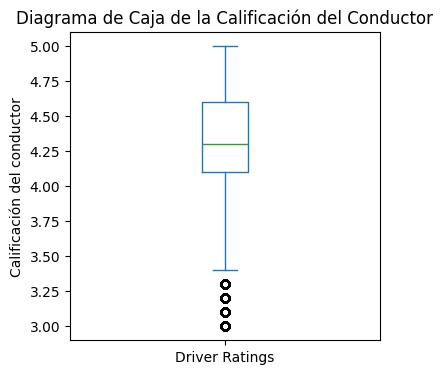

In [136]:
ax1 = (uber["Driver Ratings"]).plot.box(figsize=(4 ,4))
ax1.set_ylabel("Calificación del conductor")
plt.title("Diagrama de Caja de la Calificación del Conductor")
plt.show()

In [139]:
binnedRide=pd.cut(uber["Ride Distance"],10)
binnedRide.value_counts()

,count
Ride Distance,
"(5.9, 10.8]",11893
"(10.8, 15.7]",11838
"(15.7, 20.6]",11461
"(0.951, 5.9]",9743
"(30.4, 35.3]",9581
"(35.3, 40.2]",9549
"(20.6, 25.5]",9545
"(25.5, 30.4]",9530
"(40.2, 45.1]",9528


In [142]:
binnedDriver=pd.cut(uber["Driver Ratings"],10)
binnedDriver.value_counts()

,count
Driver Ratings,
"(4.2, 4.4]",21099
"(4.0, 4.2]",20807
"(4.4, 4.6]",14002
"(3.6, 3.8]",7638
"(4.8, 5.0]",7070
"(4.6, 4.8]",7006
"(3.8, 4.0]",5910
"(2.998, 3.2]",3742
"(3.2, 3.4]",2952


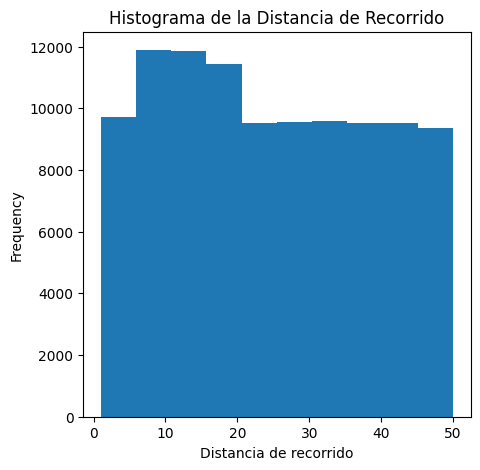

In [146]:
ax = (uber["Ride Distance"]).plot.hist(figsize=(5,5))
ax.set_xlabel("Distancia de recorrido")
plt.title("Histograma de la Distancia de Recorrido")
plt.show()

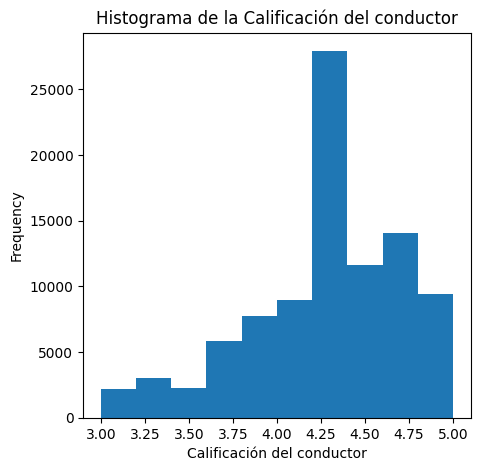

In [147]:
ax = (uber["Driver Ratings"]).plot.hist(figsize=(5,5))
ax.set_xlabel("Calificación del conductor")
plt.title("Histograma de la Calificación del conductor")
plt.show()

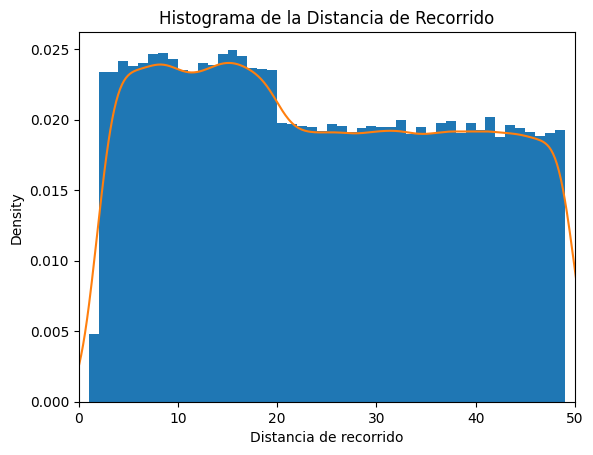

In [153]:
ax = uber["Ride Distance"].plot.hist(density = True,xlim=[0,50],bins=range(1,50))
uber["Ride Distance"].plot.density(ax=ax)
ax.set_xlabel("Distancia de recorrido")
plt.title("Histograma de la Distancia de Recorrido")
plt.show()

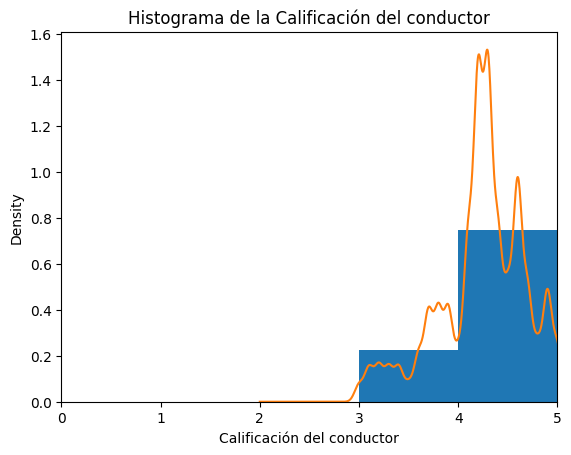

In [159]:
ax = uber["Driver Ratings"].plot.hist(density = True,xlim=[0,5],bins=range(0,1000))
uber["Driver Ratings"].plot.density(ax=ax)
ax.set_xlabel("Calificación del conductor")
plt.title("Histograma de la Calificación del conductor")
plt.show()